In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
caption_df = pd.read_csv('../data/captions.txt')
caption_df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [3]:
images = caption_df['image'].unique()[5:10]
images

array(['1007320043_627395c3d8.jpg', '1009434119_febe49276a.jpg',
       '1012212859_01547e3f17.jpg', '1015118661_980735411b.jpg',
       '1015584366_dfcec3c85a.jpg'], dtype=object)

In [4]:
caps = caption_df[caption_df['image']==images[0]]['caption'].to_list()

/home/subrata/Self/image-caption/venv/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  from ipykernel import kernelapp as app
/home/subrata/Self/image-caption/venv/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error in 3.6
  app.launch_new_instance()


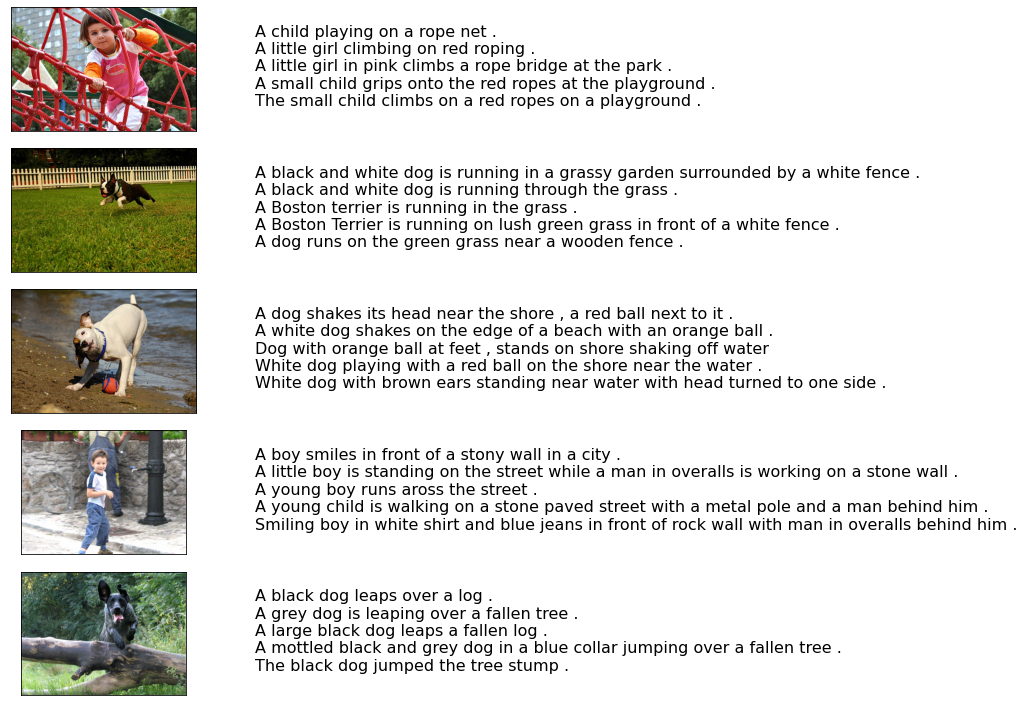

In [16]:
plt.figure(figsize=(15, 10), constrained_layout=True)
for i in range(len(images)):
    img = Image.open(f'../data/Images/{images[i]}').convert("RGB")
    caps = caption_df[caption_df['image']==images[i]]['caption'].to_list()
    ax1 = plt.subplot2grid((len(images), 3), (i, 0), colspan=1)
    ax1.imshow(img)
    plt.xticks([])
    plt.yticks([])
    ax2 = plt.subplot2grid((len(images), 3), (i, 1), colspan=2)
    cap = '\n'.join(caps)
    ax2.text(x=0.01, y=0.2, s=cap, fontsize=16)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
plt.tight_layout()
plt.savefig('data_set.png', dpi=250, bbox_inches='tight', facecolor='white', trasparent=False)
plt.show()

In [17]:
import json

In [18]:
with open('plot_data.json') as json_file:
    plot_data = json.load(json_file)

In [20]:
loss = plot_data['loss']
val_bleu = plot_data['val_bleu']

/home/subrata/Self/image-caption/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "trasparent" which is no longer supported as of 3.3 and will become an error in 3.6
  


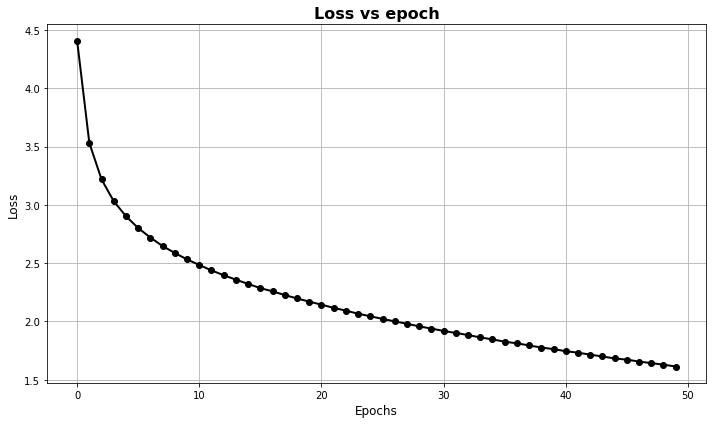

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss)), loss, '-o', linewidth=2, c='k')
plt.title(f'Loss vs epoch', fontweight='bold', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig('loss_v_epoch.png', dpi=250, bbox_inches='tight', facecolor='white', trasparent=False)
plt.show()